In [26]:
import pandas as pd

#percorso file
file_path = r"C:\Users\bugli\Desktop\GitHub\Corso-PY-e-ML\Corso Python e ML\Dataset\TMDB  IMDB Movies Dataset.csv"


#dataset
movies_df = pd.read_csv(file_path)

#esplorazione dataset
print(movies_df.head())  
print(movies_df.info())  
print(movies_df.describe(include='all')) 
print(movies_df.dtypes) 



       id            title  vote_average  vote_count    status release_date  \
0   27205        Inception         8.364       34495  Released   2010-07-15   
1  157336     Interstellar         8.417       32571  Released   2014-11-05   
2     155  The Dark Knight         8.512       30619  Released   2008-07-16   
3   19995           Avatar         7.573       29815  Released   2009-12-15   
4   24428     The Avengers         7.710       29166  Released   2012-04-25   

      revenue  runtime  adult                     backdrop_path  ...  \
0   825532764      148  False  /8ZTVqvKDQ8emSGUEMjsS4yHAwrp.jpg  ...   
1   701729206      169  False  /pbrkL804c8yAv3zBZR4QPEafpAR.jpg  ...   
2  1004558444      152  False  /nMKdUUepR0i5zn0y1T4CsSB5chy.jpg  ...   
3  2923706026      162  False  /vL5LR6WdxWPjLPFRLe133jXWsh5.jpg  ...   
4  1518815515      143  False  /9BBTo63ANSmhC4e6r62OJFuK2GL.jpg  ...   

                                             tagline  \
0               Your mind is the sce

<Figure size 1200x600 with 0 Axes>

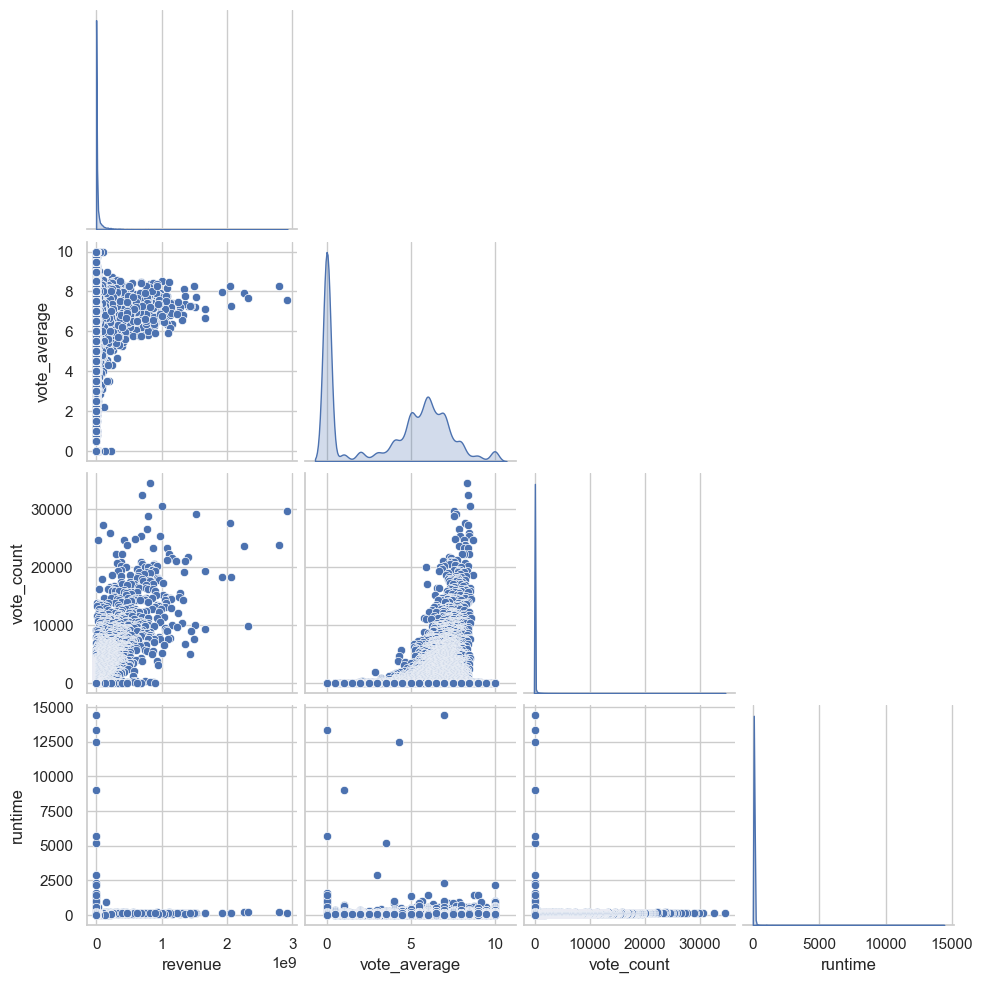

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

#configurazione iniziale per i grafici
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))


#pairplot per visualizzare correlazioni principali
sns.pairplot(
    movies_df,
    vars=['revenue', 'vote_average', 'vote_count', 'runtime'],
    diag_kind='kde',
    corner=True
)
plt.show()


In [28]:
#filtraggio per valori validi
filtered_df = movies_df[
    (movies_df['revenue'] > 0) &
    (movies_df['runtime'] > 0) &
    (movies_df['vote_count'] > 0)
]

#verifico le dimensioni dataset filtrato
print(f"Dimensioni del dataset originale: {movies_df.shape}")
print(f"Dimensioni del dataset filtrato: {filtered_df.shape}")


Dimensioni del dataset originale: (432295, 28)
Dimensioni del dataset filtrato: (15294, 28)


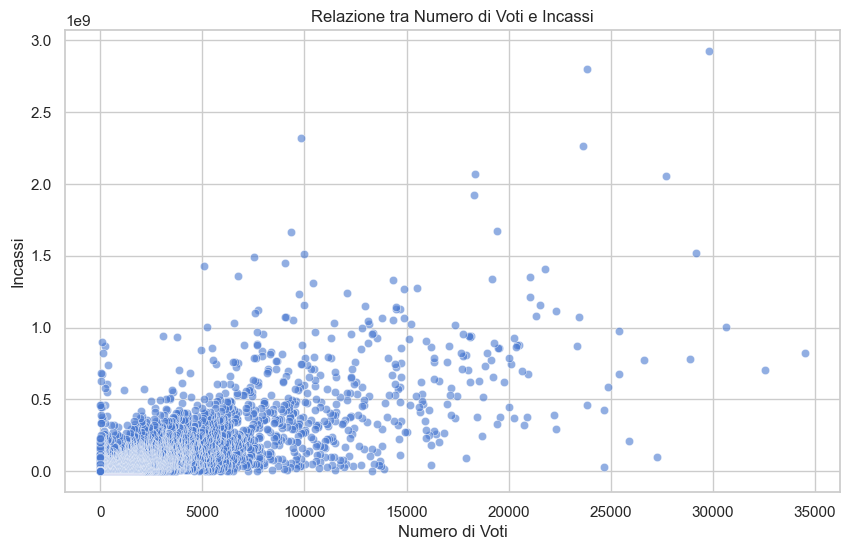

In [29]:
sns.set(style="whitegrid", palette="muted")

#relazione tra vote_count e revenue con scatterpot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=filtered_df, x="vote_count", y="revenue", alpha=0.6)
plt.title("Relazione tra Numero di Voti e Incassi")
plt.xlabel("Numero di Voti")
plt.ylabel("Incassi")
plt.show()



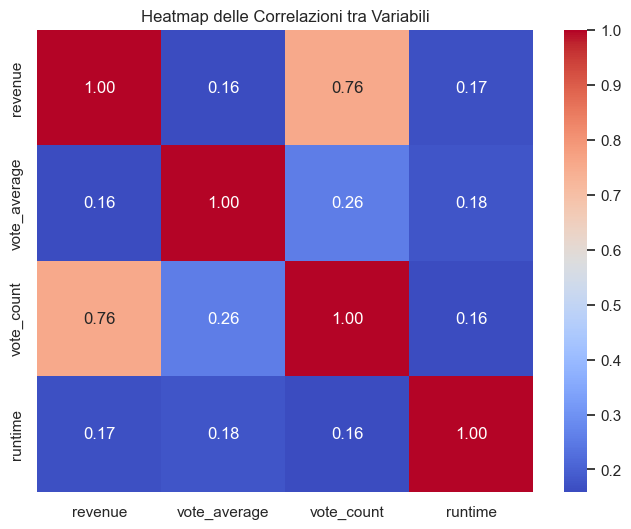

In [30]:
#heatmap per correlazione tra var principali
correlation_matrix = filtered_df[['revenue', 'vote_average', 'vote_count', 'runtime']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Heatmap delle Correlazioni tra Variabili")
plt.show()

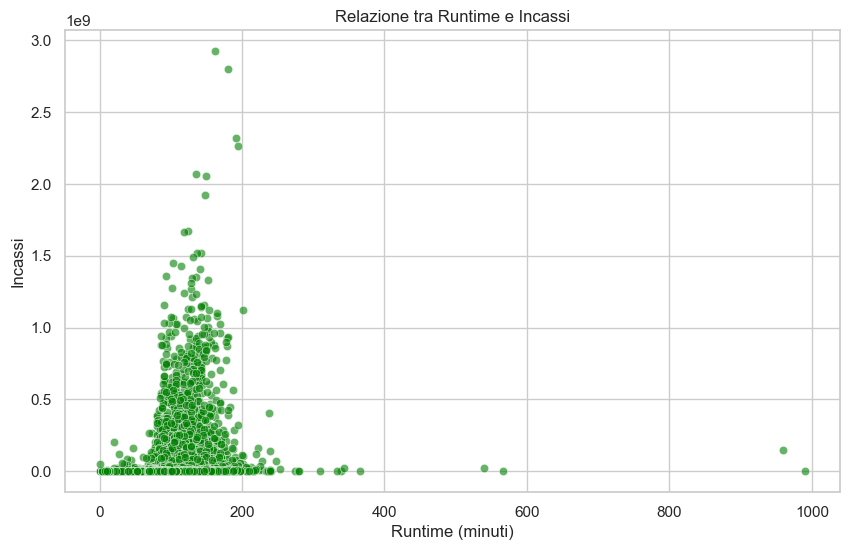

In [31]:
#relazione tra runtime e revenue con scatter
plt.figure(figsize=(10, 6))
sns.scatterplot(data=filtered_df, x="runtime", y="revenue", alpha=0.6, color="green")
plt.title("Relazione tra Runtime e Incassi")
plt.xlabel("Runtime (minuti)")
plt.ylabel("Incassi")
plt.show()

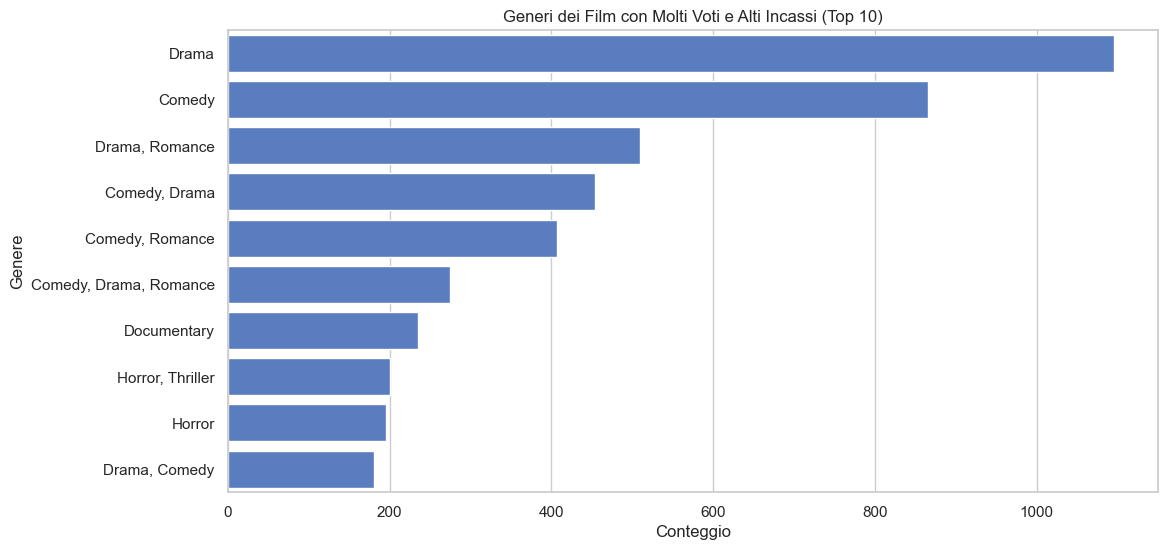

In [32]:
#filtraggio dei film con molti voti e alti incassi
molti_voti_alti_incassi = movies_df[(movies_df['vote_count'] > movies_df['vote_count'].quantile(0.75)) & 
                                    (movies_df['revenue'] > movies_df['revenue'].quantile(0.75))]

#conta i generi più frequenti
generi_top = molti_voti_alti_incassi['genres'].value_counts().head(10).index

#filtra il dataset per includere   solo i generi più frequenti
filtrati_molti_voti_alti_incassi = molti_voti_alti_incassi[molti_voti_alti_incassi['genres'].isin(generi_top)]


#visualizzazione delle caratterifstiche comuni(es.genere)
plt.figure(figsize=(12, 6))
sns.countplot(data=filtrati_molti_voti_alti_incassi, y='genres', order=filtrati_molti_voti_alti_incassi['genres'].value_counts().index)
plt.title("Generi dei Film con Molti Voti e Alti Incassi (Top 10)")
plt.xlabel("Conteggio")
plt.ylabel("Genere")
plt.show()


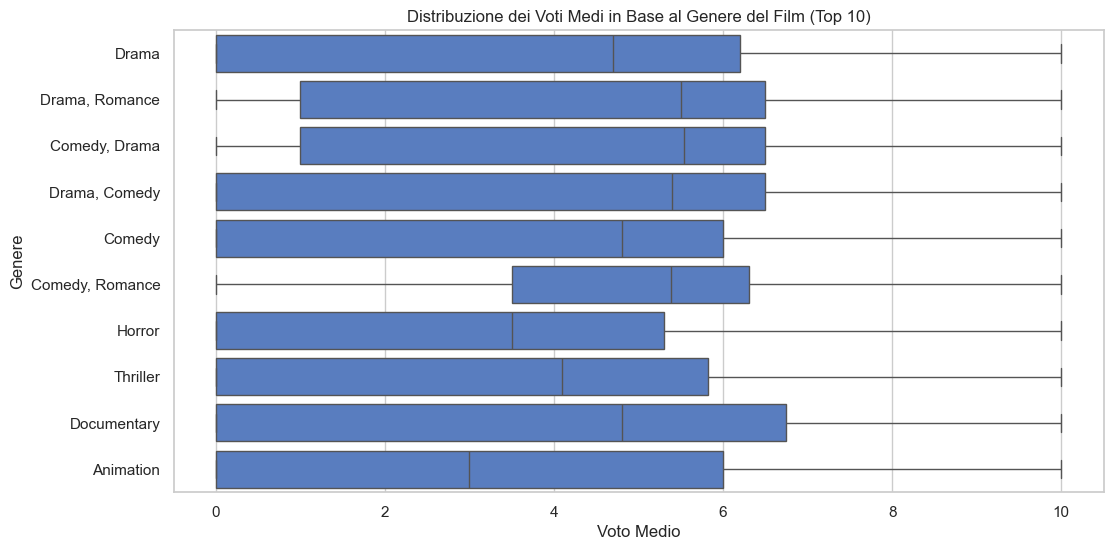

In [33]:
#conteggio dei generi più frequenti
generi_top = movies_df['genres'].value_counts().head(10).index

#filtra il dataset per includere solo i generi più frequenti
filtrati_movies_df = movies_df[movies_df['genres'].isin(generi_top)]


#distribuzione voti  in base a genere film
plt.figure(figsize=(12, 6))
sns.boxplot(data=filtrati_movies_df, x='vote_average', y='genres')
plt.title("Distribuzione dei Voti Medi in Base al Genere del Film (Top 10)")
plt.xlabel("Voto Medio")
plt.ylabel("Genere")
plt.show()



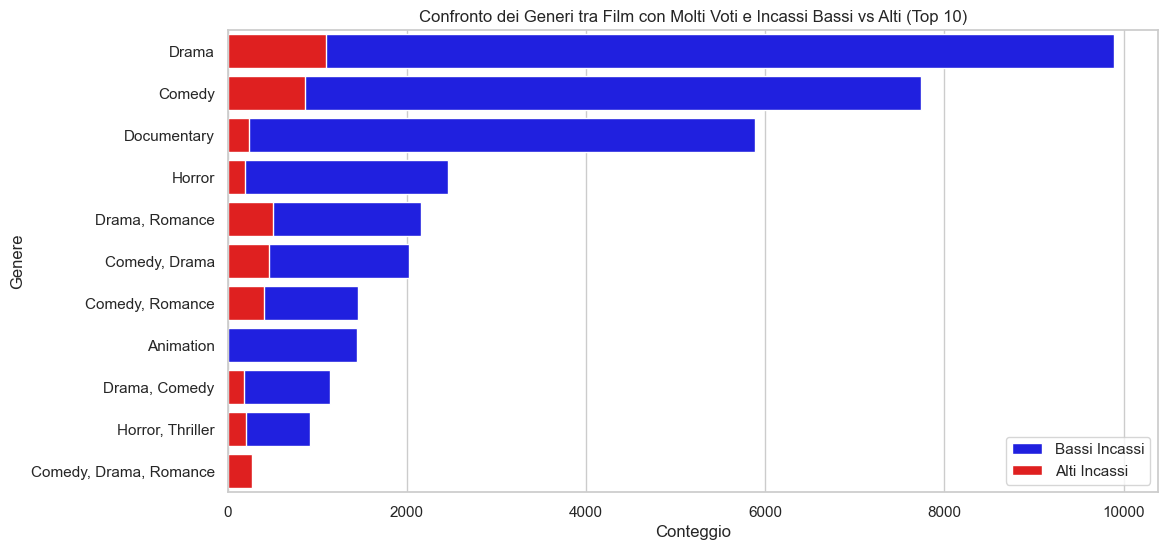

In [34]:
#filtra  film con molti voti
molti_voti = movies_df[movies_df['vote_count'] > movies_df['vote_count'].quantile(0.75)]


#suddivisione in base a incassi
molti_voti_bassi_incassi = molti_voti[molti_voti['revenue'] <= molti_voti['revenue'].median()]
molti_voti_alti_incassi = molti_voti[molti_voti['revenue'] > molti_voti['revenue'].median()]


#Conta generi più frequenti
generi_top_bassi = molti_voti_bassi_incassi['genres'].value_counts().head(10).index
generi_top_alti = molti_voti_alti_incassi['genres'].value_counts().head(10).index

#fsiltrare i dataset per includere solo i generi più frequenti
filtrati_molti_voti_bassi_incassi = molti_voti_bassi_incassi[molti_voti_bassi_incassi['genres'].isin(generi_top_bassi)]
filtrati_molti_voti_alti_incassi = molti_voti_alti_incassi[molti_voti_alti_incassi['genres'].isin(generi_top_alti)]


#cnfronto caratteristiche (es. genere)
plt.figure(figsize=(12, 6))
sns.countplot(data=filtrati_molti_voti_bassi_incassi, y='genres', order=filtrati_molti_voti_bassi_incassi['genres'].value_counts().index, color='blue', label='Bassi Incassi')
sns.countplot(data=filtrati_molti_voti_alti_incassi, y='genres', order=filtrati_molti_voti_alti_incassi['genres'].value_counts().index, color='red', label='Alti Incassi')
plt.title("Confronto dei Generi tra Film con Molti Voti e Incassi Bassi vs Alti (Top 10)")
plt.xlabel("Conteggio")
plt.ylabel("Genere")
plt.legend()
plt.show()
